In [12]:
# https://code.tutsplus.com/tutorials/understand-how-much-memory-your-python-objects-use--cms-25609
from collections import Mapping, Container
from sys import getsizeof
 
def deep_getsizeof(o, ids):
    """Find the memory footprint of a Python object
 
    This is a recursive function that drills down a Python object graph
    like a dictionary holding nested dictionaries with lists of lists
    and tuples and sets.
 
    The sys.getsizeof function does a shallow size of only. It counts each
    object inside a container as pointer only regardless of how big it
    really is.
 
    :param o: the object
    :param ids:
    :return:
    """
    d = deep_getsizeof
    if id(o) in ids:
        return 0
 
    r = getsizeof(o)
    ids.add(id(o))
 
    if isinstance(o, str) or isinstance(o, bytes): # or isinstance(0, unicode)
        return r
 
    if isinstance(o, Mapping):
        return r + sum(d(k, ids) + d(v, ids) for k, v in o.iteritems())
 
    if isinstance(o, Container):
        return r + sum(d(x, ids) for x in o)
 
    return r 

In [1]:
import fr_core_news_md, spacy
# !pip install pympler
# from pympler.asizeof import asizeof

In [23]:
nlp = spacy.load("fr_core_news_md")

In [24]:
print(asizeof(nlp))

16168720


In [27]:
map_dict = nlp.vocab.prune_vectors(10000)

c:\python36\lib\runpy.py:193: UserWarning: [W019] Changing vectors name from fr_core_news_md.vectors to fr_core_news_md.vectors_10000, to avoid clash with previously loaded vectors. See Issue #3853.
  "__main__", mod_spec)


TypeError: deep_getsizeof() missing 1 required positional argument: 'ids'

In [28]:
print(asizeof(nlp))

16168720


In [29]:
# V2  https://goshippo.com/blog/measure-real-size-any-python-object/
import sys

def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

In [35]:
nlp = spacy.load("fr_core_news_md")
print(get_size(nlp))
print(get_size(nlp.vocab.vectors))

16186569
18542384


In [37]:
print(get_size(nlp.vocab.vectors))

18542384


In [38]:
map_dict = nlp.vocab.prune_vectors(10000)
print(get_size(nlp))

c:\python36\lib\runpy.py:193: UserWarning: [W019] Changing vectors name from fr_core_news_md.vectors to fr_core_news_md.vectors_10000, to avoid clash with previously loaded vectors. See Issue #3853.
  "__main__", mod_spec)


16186569


In [40]:
print(get_size(nlp.vocab.vectors))

20712860


In [45]:
nlp.vocab.vectors

In [47]:
import numpy as np
get_size(np.random.random((300,)))*10000

25600000

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:36<00:00,  1.22s/it]


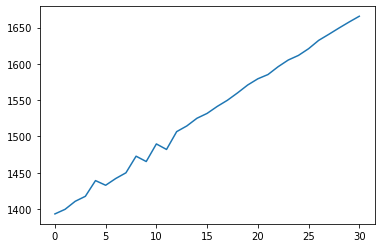

In [4]:
# Imports for SpaCy
import spacy
import tqdm

# Imports for debug
# !pip install psutil
import psutil
import os
import time

# Imports for drawing
import matplotlib.pyplot as plt

# Miscellaneous
from collections import defaultdict

nlp = spacy.load("fr_core_news_md")

# Process a "long" text
texts = ["De deux choses l'une, ou le puits était vraiment bien profond, ou elle tombait bien doucement ; car elle eut tout le loisir, dans sa chute, de regarder autour d'elle et de se demander avec étonnement ce qu'elle allait devenir. D'abord elle regarda dans le fond du trou pour savoir où elle allait ; mais il y faisait bien trop sombre pour y rien voir. Ensuite elle porta les yeux sur les parois du puits, et s'aperçut qu'elles étaient garnies d'armoires et d'étagères ; çà et là, elle vit pendues à des clous des cartes géographiques et des images. En passant elle prit sur un rayon un pot de confiture portant cette étiquette, « MARMELADE D'ORANGES. » Mais, à son grand regret, le pot était vide : elle n'osait le laisser tomber dans la crainte de tuer quelqu'un ; aussi s'arrangea-t-elle de manière à le déposer en passant dans une des armoires. « Certes, » dit Alice, « après une chute pareille je ne me moquerai pas mal de dégringoler l'escalier ! Comme ils vont me trouver brave chez nous ! Je tomberais du haut des toits que je ne ferais pas entendre une plainte. » (Ce qui était bien probable.) Tombe, tombe, tombe ! « Cette chute n'en finira donc pas ! Je suis curieuse de savoir combien de milles j'ai déjà faits, » dit-elle tout haut. « Je dois être bien près du centre de la terre. Voyons donc, cela serait à quatre mille milles de profondeur, il me semble. » (Comme vous voyez, Alice avait appris pas mal de choses dans ses leçons ; et bien que ce ne fût pas là une très-bonne occasion de faire parade de son savoir, vu qu'il n'y avait point d'auditeur, cependant c'était un bon exercice que de répéter sa leçon.) « Oui, c'est bien à peu près cela ; mais alors à quel degré de latitude ou de longitude est-ce que je me trouve ? » (Alice n'avait pas la moindre idée de ce que voulait dire latitude ou longitude, mais ces grands mots lui paraissaient beaux et sonores.) Bientôt elle reprit : « Si j'allais traverser complétement la terre ? Comme ça serait drôle de se trouver au milieu de gens qui marchent la tête en bas. Aux Antipathies, je crois. » (Elle n'était pas fâchée cette fois qu'il n'y eût personne là pour l'entendre, car ce mot ne lui faisait pas l'effet d'être bien juste.) « Eh mais, j'aurai à leur demander le nom du pays. — Pardon, Madame, est-ce ici la Nouvelle-Zemble ou l'Australie ? » — En même temps elle essaya de faire la révérence. (Quelle idée ! Faire la révérence en l'air ! Dites-moi un peu, comment vous y prendriez-vous ?) « Quelle petite ignorante ! pensera la dame quand je lui ferai cette question. Non, il ne faut pas demander cela ; peut-être le verrai-je écrit quelque part. » Tombe, tombe, tombe ! — Donc Alice, faute d'avoir rien de mieux à faire, se remit à se parler : « Dinah remarquera mon absence ce soir, bien sûr. » (Dinah c'était son chat.) « Pourvu qu'on n'oublie pas de lui donner sa jatte de lait à l'heure du thé. Dinah, ma minette, que n'es-tu ici avec moi ? Il n'y a pas de souris dans les airs, j'en ai bien peur ; mais tu pourrais attraper une chauve-souris, et cela ressemble beaucoup à une souris, tu sais. Mais les chats mangent-ils les chauves-souris ? » Ici le sommeil commença à gagner Alice. Elle répétait, à moitié endormie : « Les chats mangent-ils les chauves-souris ? Les chats mangent-ils les chauves-souris ? » Et quelquefois : « Les chauves-souris mangent-elles les chats ? » Car vous comprenez bien que, puisqu'elle ne pouvait répondre ni à l'une ni à l'autre de ces questions, peu importait la manière de les poser. Elle s'assoupissait et commençait à rêver qu'elle se promenait tenant Dinah par la main, lui disant très-sérieusement : « Voyons, Dinah, dis-moi la vérité, as-tu jamais mangé des chauves-souris ? » Quand tout à coup, pouf ! la voilà étendue sur un tas de fagots et de feuilles sèches, — et elle a fini de tomber. Alice ne s'était pas fait le moindre mal. Vite elle se remet sur ses pieds et regarde en l'air ; mais tout est noir là-haut. Elle voit devant elle un long passage et le Lapin Blanc qui court à toutes jambes. Il n'y a pas un instant à perdre ; Alice part comme le vent et arrive tout juste à temps pour entendre le Lapin dire, tandis qu'il tourne le coin : « Par ma moustache et mes oreilles, comme il se fait tard ! » Elle n'en était plus qu'à deux pas : mais le coin tourné, le Lapin avait disparu. Elle se trouva alors dans une salle longue et basse, éclairée par une rangée de lampes pendues au plafond. Il y avait des portes tout autour de la salle : ces portes étaient toutes fermées, et, après avoir vainement tenté d'ouvrir celles du côté droit, puis celles du côté gauche, Alice se promena tristement au beau milieu de cette salle, se demandant comment elle en sortirait. Tout à coup elle rencontra sur son passage une petite table à trois pieds, en verre massif, et rien dessus qu'une toute petite clef d'or. Alice pensa aussitôt que ce pouvait être celle d'une des portes ; mais hélas ! soit que les serrures fussent trop grandes, soit que la clef fût trop petite, elle ne put toujours en ouvrir aucune. Cependant, ayant fait un second tour, elle aperçut un rideau placé très-bas et qu'elle n'avait pas vu d'abord ; par derrière se trouvait encore une petite porte à peu près quinze pouces de haut ; elle essaya la petite clef d'or à la serrure, et, à sa grande joie, il se trouva qu'elle y allait à merveille. Alice ouvrit la porte, et vit qu'elle conduisait dans un étroit passage à peine plus large qu'un trou à rat. Elle s'agenouilla, et, jetant les yeux le long du passage, découvrit le plus ravissant jardin du monde. Oh ! Qu'il lui tardait de sortir de cette salle ténébreuse et d'errer au milieu de ces carrés de fleurs brillantes, de ces fraîches fontaines ! Mais sa tête ne pouvait même pas passer par la porte. « Et quand même ma tête y passerait, » pensait Alice, « à quoi cela servirait-il sans mes épaules ? Oh ! que je voudrais donc avoir la faculté de me fermer comme un télescope ! Ça se pourrait peut-être, si je savais comment m'y prendre. » Il lui était déjà arrivé tant de choses extraordinaires, qu'Alice commençait à croire qu'il n'y en avait guère d'impossibles. Comme cela n'avançait à rien de passer son temps à attendre à la petite porte, elle retourna vers la table, espérant presque y trouver une autre clef, ou tout au moins quelque grimoire donnant les règles à suivre pour se fermer comme un télescope. Cette fois elle trouva sur la table une petite bouteille (qui certes n'était pas là tout à l'heure). Au cou de cette petite bouteille était attachée une étiquette en papier, avec ces mots « BUVEZ-MOI » admirablement imprimés en grosses lettres."]

# Beam configuration
beam_width = 16
beam_density = 0.0001

# For plots
x = []
y = []

# Treat the document multiple times
for i in tqdm.tqdm(range(0, 30)):
    x.append(i)
    process = psutil.Process(os.getpid())
    y.append(process.memory_info().rss / 1000000)

    with nlp.disable_pipes('ner'):
        docs = list(nlp.pipe(texts))
    beams = nlp.entity.beam_parse(docs, beam_width=beam_width, beam_density=beam_density)

    for doc, beam in zip(docs, beams):
        entity_scores = defaultdict(float)
        for score, ents in nlp.entity.moves.get_beam_parses(beam):
            for start, end, label in ents:
                entity_scores[(start, end, label)] += score

# Give time for gc to do its work if needed
time.sleep(30)
x.append(x[-1]+1)
process = psutil.Process(os.getpid())
y.append(process.memory_info().rss / 1000000)

# Display memory usage evolution
plt.plot(x, y)
plt.show()

In [4]:
import os, psutil
def show_memory():
    process = psutil.Process(os.getpid())
    print(process.memory_info().rss / 1000000, "MB")
show_memory()

57.36448 MB


In [5]:
import spacy
show_memory()

105.34912 MB


In [7]:
def show_memory():
    process = psutil.Process(os.getpid())
    print(process.memory_info().rss / 1000000, "MB")
nlp = spacy.load("fr_core_news_md")
show_memory()

1012.604928 MB


In [8]:
import flask

ModuleNotFoundError: No module named 'flask'